In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, classification_report

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
heart_failure = pd.read_csv('../datasets/heart_failure.csv')

In [5]:
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
from sklearn.preprocessing import StandardScaler 

In [7]:
X = heart_failure.drop('DEATH_EVENT', axis=1)
y = heart_failure['DEATH_EVENT']

In [9]:
heart_failure['DEATH_EVENT'].value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state=42)

In [12]:
y_test.value_counts(normalize=True)

0    0.683333
1    0.316667
Name: DEATH_EVENT, dtype: float64

In [16]:
# ss = StandardScaler()

In [17]:
# x_train_std = ss.fit_transform(x_train)

In [18]:
# x_test_std = ss.transform(x_test)

In [24]:
model = LogisticRegression(max_iter=5000)

In [30]:
kf = KFold(n_splits=30, shuffle=True, random_state=42)

In [31]:
results_cv = cross_validate(estimator=model, X=X, y=y,
                           cv=kf, scoring="accuracy",
                           return_train_score=True, return_estimator=True)

In [32]:
resultados = pd.DataFrame(results_cv)

In [35]:
resultados.describe()

,fit_time,score_time,test_score,train_score
count,30.000000,30.000000,30.000000,30.000000
mean,0.018597,0.001167,0.818889,0.825164
std,0.004303,0.000378,0.155039,0.006900
min,0.009980,0.000986,0.500000,0.816609
25%,0.015999,0.001000,0.700000,0.820069
50%,0.017001,0.001001,0.850000,0.823529
75%,0.022009,0.001003,0.900000,0.826990
max,0.026989,0.002000,1.000000,0.840830


In [38]:
breast_cancer = pd.read_csv('../datasets/breast_cancer.csv')

In [39]:
breast_cancer = breast_cancer.drop(columns=['id'], axis=1)

In [40]:
X = breast_cancer.drop('diagnosis', axis=1)
y = breast_cancer['diagnosis']

In [41]:
scaler = StandardScaler()

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state=42)

In [43]:
x_train_std = scaler.fit_transform(x_train)

In [44]:
x_test_std = scaler.transform(x_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [92]:
knc =KNeighborsClassifier(n_neighbors=9, metric='manhattan')

In [93]:
knc.fit(x_train_std, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [94]:
y_pred = knc.predict(x_test_std)

C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [95]:
mc = confusion_matrix(y_test, y_pred)

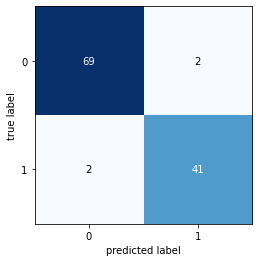

In [96]:
plot_confusion_matrix(conf_mat=mc)
plt.show()

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

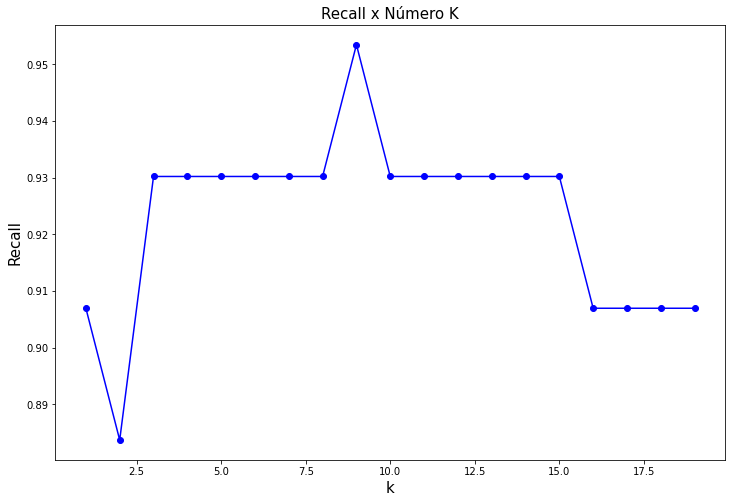

Melhor k: 9


In [86]:
from sklearn.metrics import recall_score
import numpy as np

ks = []
recalls = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_test_std)
    rec = recall_score(y_test, y_pred, pos_label='M')
    recalls.append(rec)
    ks.append(k)

plt.figure(figsize=(12,8))
plt.plot(ks, recalls, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Recall', fontsize = 15)
plt.title('Recall x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(recalls)+1
print('Melhor k:', best_k)

In [97]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [99]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']